# Hw9 (jitted mandelbrot set)

Mirpulatov Islombek

PHD-1, CDSE

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Regular vesion
def julia_set(Z, C):
    return Z ** 2 + C


def calculate_julia_set(shape, points, max_iterations, C):
    X = np.linspace(-shape, shape, points)
    Y = np.linspace(-shape, shape, points)

    results = np.zeros((points, points), dtype=np.uint8)

    for i in range(points):
        for j in range(points):
            z = complex(X[i], Y[j])
            for k in range(max_iterations):
                z = julia_set(z, C)
                if abs(z) > 2:
                        results[i][j] = k
                        break
                results[i][j] = max_iterations

    return results


def plot_julia_set(data, shape):
    plt.figure(figsize=(10, 10))
    plt.ylabel('Re(z0)', fontsize=18)
    plt.xlabel('Im(z0)', fontsize=18)
    plt.imshow(data, extent=(-shape, shape, -shape, shape), origin='lower', cmap='flag')

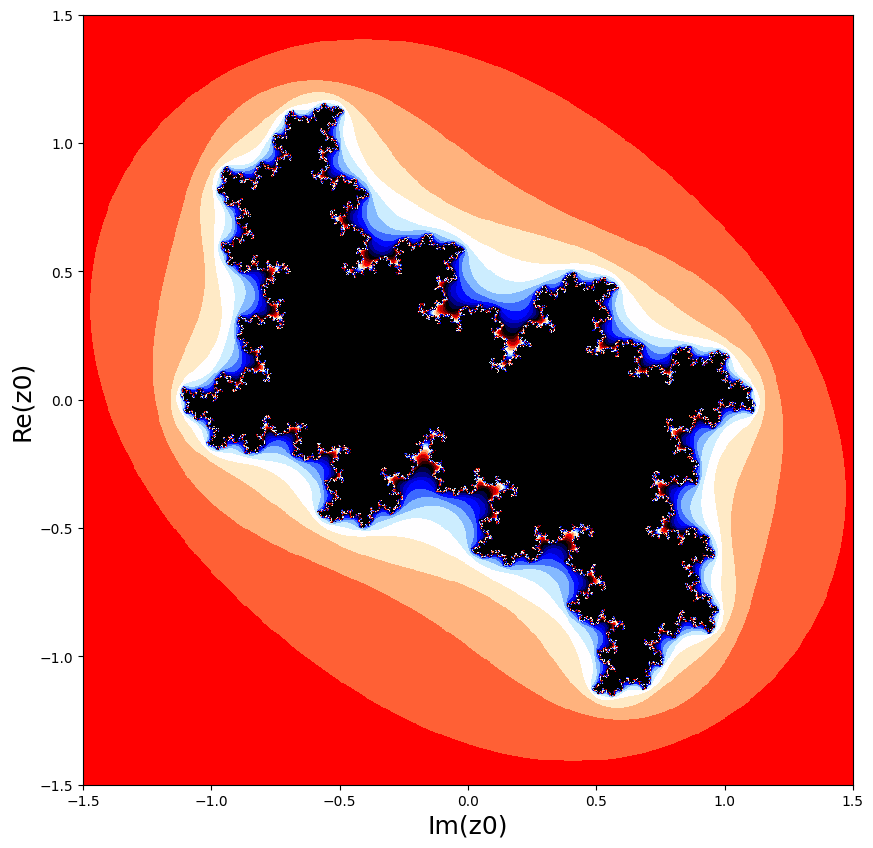

In [12]:
result = calculate_julia_set(shape=1.5, points=800, max_iterations=255, C=complex(.1, .6))
plot_julia_set(data=result, shape=1.5)

In [14]:
from numba import njit

In [15]:
@njit
def numba_julia_set(Z, C):
    return Z ** 2 + C

@njit
def numba_calculate_julia_set(shape, points, max_iterations, C):
    X = np.linspace(-shape, shape, points)
    Y = np.linspace(-shape, shape, points)

    results = np.zeros((points, points), dtype=np.uint8)

    for i in range(points):
        for j in range(points):
            z = complex(X[i], Y[j])
            for k in range(max_iterations):
                z = numba_julia_set(z, C)
                if abs(z) > 2:
                        results[i][j] = k
                        break
                results[i][j] = max_iterations

    return results

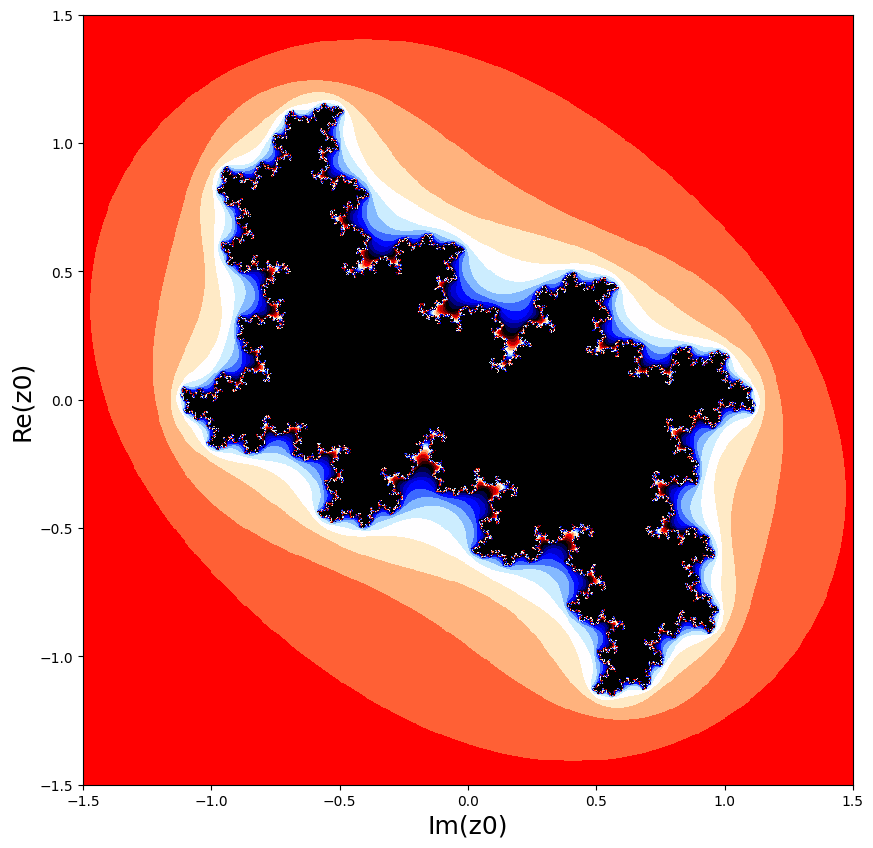

In [16]:
result = numba_calculate_julia_set(shape=1.5, points=800, max_iterations=255, C=complex(.1, .6))
plot_julia_set(data=result, shape=1.5)

In [17]:
%%timeit
result = calculate_julia_set(shape=1.5, points=800, max_iterations=255, C=complex(.1, .6))

25.5 s ± 3.15 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
result = numba_calculate_julia_set(shape=1.5, points=800, max_iterations=255, C=complex(.1, .6))

448 ms ± 51.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
import time

In [40]:
list(range(100, 850, 50))

[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

In [41]:
regular_time = []
numba_time = []
for j in range(10, 260, 20):
  r = []
  for i in range(5):
    start_time = time.time()
    _ = calculate_julia_set(shape=1.5, points=500, max_iterations=j, C=complex(.1, .6))
    end_time = time.time()
    elapsed_time = end_time - start_time
    r.append(elapsed_time)
  r = np.mean(r)
  regular_time.append(r)


  n = []
  for i in range(5):
    start_time = time.time()
    _ = numba_calculate_julia_set(shape=1.5, points=500, max_iterations=j, C=complex(.1, .6))
    end_time = time.time()
    elapsed_time = end_time - start_time
    n.append(elapsed_time)
  n = np.mean(n)
  numba_time.append(n)

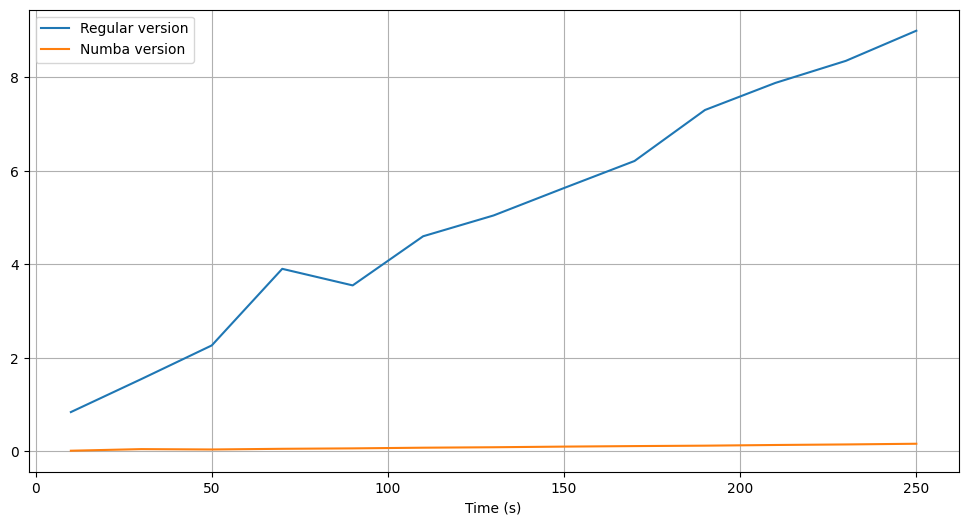

In [42]:
ox = list(range(10, 260, 20))
plt.figure(figsize=(12, 6))
plt.plot(ox, regular_time, label='Regular version')
plt.plot(ox, numba_time, label='Numba version')
plt.xlabel('Max iterations')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()